In [1]:
import sys
import numpy as np
import time
import matplotlib.pyplot as plt

sys.path.append(r'C:\Chuji\Code_and_Data\MyCode')    ### modify this address

import Circuit_Simulator 
import PulseGenerator as PG
from toolfunc import *
from toolfunc import adia_analysis
from Circuit_Simulator._util import *
from Circuit_Simulator.Qobj import *
import scipy.optimize as sci_op

In [3]:
np.prod([1,-0.3,3])

-0.8999999999999999

{'Q1_freq': '6000.0MHz', 'Q1_anhar': '-125.0MHz', 'Q2_freq': '7870.0115MHz', 'Q2_anhar': '-150.0MHz', 'Q3_freq': '5400.0MHz', 'Q3_anhar': '-125.0MHz', 'g12': '123.6903MHz', 'g13': '8.5381MHz', 'g23': '117.343MHz'}


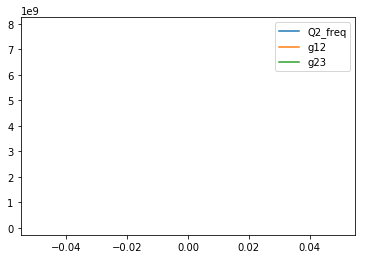

In [4]:
raw_config = Circuit_Simulator.RawConfig(qubit_num=3,dimension=3,circuit_type=1,initial_state='RB60_1',sampling_rate=1e9)
raw_config.load_default_value(modulation=True,decoherence=False,use_capacitance=False)

flux_pulse = np.linspace(0/7.2,0/7.2,400)
freq_array = 8.2e9-flux_pulse * (8.2e9 - 1e9)

raw_config.setValue('Q1 f01_max',6.0e9)
raw_config.setValue('Q2 f01_max',8.2e9)
raw_config.setValue('Q3 f01_max',5.4e9)
raw_config.setValue('Q1 f01_min',1e9)
raw_config.setValue('Q2 f01_min',1e9)
raw_config.setValue('Q3 f01_min',1e9)
raw_config.setValue('Q1 Ec',0.25e9)
raw_config.setValue('Q2 Ec',0.30e9)
raw_config.setValue('Q3 Ec',0.25e9)

raw_config.setValue('r12',0.018)
raw_config.setValue('r23',0.018)
raw_config.setValue('r13',0.0015)

raw_config.setValue('Q2 Voltage period',1)
raw_config.setValue('Q2 Voltage operating point',0.12505)
raw_config.setValue('Q2 Flux',flux_pulse)

simu_config = Circuit_Simulator.read_config(raw_config.get_dict())
Simulator = Circuit_Simulator.Simulator(simu_config)
Simulator.show_pulse()

In [5]:
len(range(1,3))

2

In [2]:
transmon = PG.Transmon(8.2e9, 1e9, 300e6, 1, 0, 0.12505)

In [3]:
import time

time: 0.4677269458770752 0.49265313148498535 0.5834124088287354 0.5834124088287354
0.5993943214416504


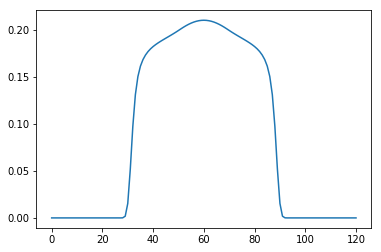

In [7]:

time_s = time.time()
gate_time=30e-9
SRATE=2e9
f_term=1


factor1=1.0 
factorc=1.0 
factor2=1.0 

lamb1 = 1.2
total_len = gate_time + 30e-9

Seq=PG.Sequence(total_len=total_len,sample_rate=SRATE,complex_trace=False)
Seq.clear_pulse(tips_on=False)
Seq.add_pulse('Adiabatic',t0=total_len/2,width=gate_time,plateau=0e-9,frequency=0,F_Terms=f_term,Lcoeff=np.array(lamb1),qubit=transmon,Q1_freq=6.0e9,
             CPLR_idle_freq=(7.87e9-6e9)*factorc+6e9,Q2_freq=6e9+(5.4e9-6e9)*factor2,constant_coupling=False,r1c=0.018*factor1,r2c=0.018*factor2,r12=0.0015*factorc,anhar_CPLR=-300e6*factorc,
             anhar_Q1=-250e6*factor1,anhar_Q2=-250e6*factor2,negative_amplitude=False,dfdV=1,gap_threshold=8e6,freqpoints=301,pulsepoints=601)
Seq.add_filter('Gauss Low Pass',300e6)
flux_pulse=Seq.get_sequence()


time_e = time.time()
print(time_e-time_s)
plt.plot(flux_pulse)

In [15]:
a={'asd':1,'www':2}

In [18]:
i=1
s=' 12'
f'L{i}, 2QB{s}'

'L1, 2QB 12'

In [6]:
def get_RB_error(pulse_params,*args):
    gate_time,SRATE,f_term=args
    lamb1 = pulse_params
    total_len = gate_time + 10e-9
    
    Seq=PG.Sequence(total_len=total_len,sample_rate=SRATE,complex_trace=False)
    Seq.clear_pulse(tips_on=False)
    Seq.add_pulse('Adiabatic',t0=total_len/2,width=gate_time,plateau=0e-9,frequency=0,F_Terms=f_term,Lcoeff=np.array(lamb1),qubit=transmon,Q1_freq=6.0e9,
                 CPLR_idle_freq=(7.87e9-6e9)*1+6e9,Q2_freq=6e9+(5.4e9-6e9)*1,constant_coupling=False,r1c=0.018*1,r2c=0.018*1,r12=0.0015*1,anhar_CPLR=-300e6*1,
                 anhar_Q1=-250e6*1,anhar_Q2=-250e6*1,negative_amplitude=False,dfdV=1,gap_threshold=8e6,freqpoints=301,pulsepoints=601)
    Seq.add_filter('Gauss Low Pass',300e6)
    flux_pulse=Seq.get_sequence()
    
    U_defined=False
    Error60 = []
    for idx in range(60):
        raw_config = Circuit_Simulator.RawConfig(qubit_num=3,dimension=3,circuit_type=1,initial_state='RB60_'+str(59-idx),sampling_rate=SRATE)
        raw_config.load_default_value(modulation=True,decoherence=False,use_capacitance=False)
        raw_config.setValue('Q1 f01_max',6.0e9)
        raw_config.setValue('Q2 f01_max',8.2e9)
        raw_config.setValue('Q3 f01_max',5.4e9)
        raw_config.setValue('Q1 f01_min',1e9)
        raw_config.setValue('Q2 f01_min',1e9)
        raw_config.setValue('Q3 f01_min',1e9)
        raw_config.setValue('Q1 Ec',0.25e9)
        raw_config.setValue('Q2 Ec',0.30e9)
        raw_config.setValue('Q3 Ec',0.25e9)
        raw_config.setValue('r12',0.018)
        raw_config.setValue('r23',0.018)
        raw_config.setValue('r13',0.0015)
        raw_config.setValue('Q2 Voltage period',1)
        raw_config.setValue('Q2 Voltage operating point',0.12505)
        raw_config.setValue('Q2 Flux',flux_pulse)

        simu_config = Circuit_Simulator.read_config(raw_config.get_dict())
        Simulator = Circuit_Simulator.Simulator(simu_config)
        Simulator.performsimulation(solver_type=0)
        
        final_state = Circuit_Simulator._util.trunc_to_specific_subspace( Simulator.StateResult.rho_trace[-1].full(),nTrunc=[3,3,3],subspace=['000','001','100','101'] )
        initial_state = Circuit_Simulator._util.trunc_to_specific_subspace(Simulator.StateResult.rho_trace[0].full(),nTrunc=[3,3,3],subspace=['000','001','100','101'] )
        
        if U_defined == False:
            U10 = qt.tensor( qt.qeye(2), Circuit_Simulator.Qobj.Z_Gate( np.angle(final_state[0][1])-np.angle(initial_state[0][1])).U  )
            U01 = qt.tensor( Circuit_Simulator.Qobj.Z_Gate(np.angle(final_state[0][2])-np.angle(initial_state[0][2])).U, qt.qeye(2))
            Ucz = qt.Qobj([[1,0,0,0],[0,1,0,0],[0,0,1,0],[0,0,0,-1]])
            U_defined = True
            
        U  = Qflatten(U10*U01)*Ucz
        error = 1 - np.abs((U.dag()*qt.Qobj(initial_state)*U*qt.Qobj(final_state)).tr())
        print(error)
        Error60.append(error)
    return np.mean(np.array(Error60))


def cost_func(pulse_params,*args):
    gate_time,SRATE,f_term=args

    lamb1 = pulse_params
    total_len = gate_time + 10e-9
    
    
    Seq=PG.Sequence(total_len=total_len,sample_rate=SRATE,complex_trace=False)
    Seq.clear_pulse(tips_on=False)
    Seq.add_pulse('Adiabatic',t0=total_len/2,width=gate_time,plateau=0e-9,frequency=0,F_Terms=f_term,Lcoeff=np.array(lamb1),qubit=transmon,Q1_freq=6.0e9,
                 CPLR_idle_freq=(7.87e9-6e9)*1+6e9,Q2_freq=6e9+(5.4e9-6e9)*1,constant_coupling=False,r1c=0.018*1,r2c=0.018*1,r12=0.0015*1,anhar_CPLR=-300e6*1,
                 anhar_Q1=-250e6*1,anhar_Q2=-250e6*1,negative_amplitude=False,dfdV=1,gap_threshold=8e6,freqpoints=301,pulsepoints=601)
    Seq.add_filter('Gauss Low Pass',300e6)
    flux_pulse=Seq.get_sequence()

    raw_config = Circuit_Simulator.RawConfig(qubit_num=3,dimension=3,circuit_type=1,initial_state='-Z+Z+Z',sampling_rate=SRATE)
    raw_config.load_default_value(modulation=True,decoherence=False,use_capacitance=False)
    
    raw_config.setValue('Q1 f01_max',6.0e9)
    raw_config.setValue('Q2 f01_max',8.2e9)
    raw_config.setValue('Q3 f01_max',5.4e9)
    raw_config.setValue('Q1 f01_min',1e9)
    raw_config.setValue('Q2 f01_min',1e9)
    raw_config.setValue('Q3 f01_min',1e9)
    raw_config.setValue('Q1 Ec',0.25e9)
    raw_config.setValue('Q2 Ec',0.30e9)
    raw_config.setValue('Q3 Ec',0.25e9)

    raw_config.setValue('r12',0.018)
    raw_config.setValue('r23',0.018)
    raw_config.setValue('r13',0.0015)

    raw_config.setValue('Q2 Voltage period',1)
    raw_config.setValue('Q2 Voltage operating point',0.12505)
    raw_config.setValue('Q2 Flux',flux_pulse)

    simu_config = Circuit_Simulator.read_config(raw_config.get_dict())
    Simulator = Circuit_Simulator.Simulator(simu_config)

    Simulator.performsimulation(solver_type=1)
    Simulator.UnitaryResult.get_U(-1)
    Simulator.UnitaryResult.get_subspace_operator(['000','001','100','101'])
    Simulator.UnitaryResult.remove_single_qubit_gate()
    Simulator.UnitaryResult.set_Target_gate('CZ')
    Simulator.UnitaryResult.get_Gate_Fidelity()
    fidelity = Simulator.UnitaryResult.Gate_Fidelity

#     print('lamb:',lamb1)
#     print('error:',1-fidelity)
    return 1 - fidelity

In [24]:
def get_RB_error_excited_coupler(pulse_params,*args):
    gate_time,SRATE,f_term=args
    lamb1 = pulse_params
    total_len = gate_time + 10e-9
    
    Seq=PG.Sequence(total_len=total_len,sample_rate=SRATE,complex_trace=False)
    Seq.clear_pulse(tips_on=False)
    Seq.add_pulse('Adiabatic',t0=total_len/2,width=gate_time,plateau=0e-9,frequency=0,F_Terms=f_term,Lcoeff=np.array(lamb1),qubit=transmon,Q1_freq=6.0e9,
                 CPLR_idle_freq=(7.87e9-6e9)*1+6e9,Q2_freq=6e9+(5.4e9-6e9)*1,constant_coupling=False,r1c=0.018*1,r2c=0.018*1,r12=0.0015*1,anhar_CPLR=-300e6*1,
                 anhar_Q1=-250e6*1,anhar_Q2=-250e6*1,negative_amplitude=False,dfdV=1,gap_threshold=8e6,freqpoints=301,pulsepoints=601)
    Seq.add_filter('Gauss Low Pass',300e6)
    flux_pulse=Seq.get_sequence()
    
    raw_config = Circuit_Simulator.RawConfig(qubit_num=3,dimension=3,circuit_type=1,initial_state='RB60_'+str(59),sampling_rate=SRATE)
    raw_config.load_default_value(modulation=True,decoherence=False,use_capacitance=False)
    raw_config.setValue('Q1 f01_max',6.0e9)
    raw_config.setValue('Q2 f01_max',8.2e9)
    raw_config.setValue('Q3 f01_max',5.4e9)
    raw_config.setValue('Q1 f01_min',1e9)
    raw_config.setValue('Q2 f01_min',1e9)
    raw_config.setValue('Q3 f01_min',1e9)
    raw_config.setValue('Q1 Ec',0.25e9)
    raw_config.setValue('Q2 Ec',0.30e9)
    raw_config.setValue('Q3 Ec',0.25e9)
    raw_config.setValue('r12',0.018)
    raw_config.setValue('r23',0.018)
    raw_config.setValue('r13',0.0015)
    raw_config.setValue('Q2 Voltage period',1)
    raw_config.setValue('Q2 Voltage operating point',0.12505)
    raw_config.setValue('Q2 Flux',flux_pulse)

    simu_config = Circuit_Simulator.read_config(raw_config.get_dict())
    Simulator = Circuit_Simulator.Simulator(simu_config)
    Simulator.performsimulation(solver_type=0)

    final_state = Circuit_Simulator._util.trunc_to_specific_subspace( Simulator.StateResult.rho_trace[-1].full(),nTrunc=[3,3,3],subspace=['000','001','100','101'] )
    initial_state = Circuit_Simulator._util.trunc_to_specific_subspace(Simulator.StateResult.rho_trace[0].full(),nTrunc=[3,3,3],subspace=['000','001','100','101'] )

    U10 = qt.tensor( qt.qeye(2), Circuit_Simulator.Qobj.Z_Gate( np.angle(final_state[0][1])-np.angle(initial_state[0][1])).U  )
    U01 = qt.tensor( Circuit_Simulator.Qobj.Z_Gate(np.angle(final_state[0][2])-np.angle(initial_state[0][2])).U, qt.qeye(2))
    Ucz = qt.Qobj([[1,0,0,0],[0,1,0,0],[0,0,1,0],[0,0,0,-1]])
    U  = Qflatten(U10*U01)*Ucz
    error = 1 - np.abs((U.dag()*qt.Qobj(initial_state)*U*qt.Qobj(final_state)).tr())
    print('error_unexcited',error)

    Error60 = []
    for idx in range(60):
        raw_config = Circuit_Simulator.RawConfig(qubit_num=3,dimension=3,circuit_type=1,initial_state='RB_C_60_'+str(59-idx),sampling_rate=SRATE)
        raw_config.load_default_value(modulation=True,decoherence=False,use_capacitance=False)
        raw_config.setValue('Q1 f01_max',6.0e9)
        raw_config.setValue('Q2 f01_max',8.2e9)
        raw_config.setValue('Q3 f01_max',5.4e9)
        raw_config.setValue('Q1 f01_min',1e9)
        raw_config.setValue('Q2 f01_min',1e9)
        raw_config.setValue('Q3 f01_min',1e9)
        raw_config.setValue('Q1 Ec',0.25e9)
        raw_config.setValue('Q2 Ec',0.30e9)
        raw_config.setValue('Q3 Ec',0.25e9)
        raw_config.setValue('r12',0.018)
        raw_config.setValue('r23',0.018)
        raw_config.setValue('r13',0.0015)
        raw_config.setValue('Q2 Voltage period',1)
        raw_config.setValue('Q2 Voltage operating point',0.12505)
        raw_config.setValue('Q2 Flux',flux_pulse)

        simu_config = Circuit_Simulator.read_config(raw_config.get_dict())
        Simulator = Circuit_Simulator.Simulator(simu_config)
        Simulator.performsimulation(solver_type=0)
        
        final_state = Circuit_Simulator._util.trunc_to_specific_subspace( Simulator.StateResult.rho_trace[-1].full(),nTrunc=[3,3,3],subspace=['010','011','110','111'] )
        initial_state = Circuit_Simulator._util.trunc_to_specific_subspace(Simulator.StateResult.rho_trace[0].full(),nTrunc=[3,3,3],subspace=['010','011','110','111'] )
            
        U  = Qflatten(U10*U01)*Ucz
        error = 1 - np.abs((U.dag()*qt.Qobj(initial_state)*U*qt.Qobj(final_state)).tr())
        if idx==1:
            print('coupler_excited_init:',initial_state)
            print('coupler_excited_final:',final_state)
            
        print(error)
        Error60.append(error)
    return np.mean(np.array(Error60))

In [25]:
# SRATE=10e9
# RB_error_arr = []
# Unitary_error_arr =[]
# Pulse_params_arr = []

# gate_time_arr = np.append( np.arange(30e-9,60.1e-9,1e-9), np.arange(62e-9,100.1e-9,2e-9) )
# raw_initial_seeds=np.array([0.85])

# for gate_time in gate_time_arr:
#     time_start = time.time()
#     DATA = sci_op.minimize(cost_func,raw_initial_seeds,args=(gate_time,SRATE,1), method='Nelder-Mead', options={'disp': True,'ftol':1e-6,'xtol':1e-6,'maxiter':60})

#     Unitary_error_arr.append(DATA.fun)
#     Pulse_params_arr.append(DATA.x)
#     print('gate time',gate_time)
#     print('U_error',DATA.fun)
    
#     RB_error_arr.append( get_RB_error(DATA.x,*(gate_time,SRATE,1)) )
    
#     raw_initial_seeds =DATA.x*0.92

#     print('RB_error',RB_error_arr[-1])
    
#     print(time.time()-time_start)
    
#     np.savetxt(r'C:\Chuji\Latex_Papers\Mypapers\ZZ_coupling_20210205\fig_zz\RB_error_data\excited_coupler\Pulse_params_arr_detail.txt',Pulse_params_arr )
#     np.savetxt(r'C:\Chuji\Latex_Papers\Mypapers\ZZ_coupling_20210205\fig_zz\RB_error_data\excited_coupler\RB_error_arr_detail.txt',RB_error_arr )
#     np.savetxt(r'C:\Chuji\Latex_Papers\Mypapers\ZZ_coupling_20210205\fig_zz\RB_error_data\excited_coupler\Unitary_error_arr_detail.txt',Unitary_error_arr )
#     np.savetxt(r'C:\Chuji\Latex_Papers\Mypapers\ZZ_coupling_20210205\fig_zz\RB_error_data\excited_coupler\gate_time_arr_detail.txt',gate_time_arr )

In [26]:
# fig=plt.figure()
# ax = fig.add_subplot(111)
# ax.plot(gate_time_arr,RB_error_arr)
# ax.plot(gate_time_arr,Unitary_error_arr)
# ax.set_yscale('log')

In [27]:

# gate_time,SRATE,f_term=(30e-9,10e9,1)
# lamb1 = 0.84697266
# total_len = gate_time + 10e-9

# Seq=PG.Sequence(total_len=total_len,sample_rate=SRATE,complex_trace=False)
# Seq.clear_pulse(tips_on=False)
# Seq.add_pulse('Adiabatic',t0=total_len/2,width=gate_time,plateau=0e-9,frequency=0,F_Terms=f_term,Lcoeff=np.array(lamb1),qubit=transmon,Q1_freq=6.0e9,
#              CPLR_idle_freq=(7.87e9-6e9)*1+6e9,Q2_freq=6e9+(5.4e9-6e9)*1,constant_coupling=False,r1c=0.018*1,r2c=0.018*1,r12=0.0015*1,anhar_CPLR=-300e6*1,
#              anhar_Q1=-250e6*1,anhar_Q2=-250e6*1,negative_amplitude=False,dfdV=1,gap_threshold=8e6,freqpoints=301,pulsepoints=601)
# Seq.add_filter('Gauss Low Pass',300e6)
# flux_pulse=Seq.get_sequence()

# raw_config = Circuit_Simulator.RawConfig(qubit_num=3,dimension=3,circuit_type=1,initial_state='RB60_'+str(6),sampling_rate=SRATE)
# raw_config.load_default_value(modulation=True,decoherence=False,use_capacitance=False)
# raw_config.setValue('Q1 f01_max',6.0e9)
# raw_config.setValue('Q2 f01_max',8.2e9)
# raw_config.setValue('Q3 f01_max',5.4e9)
# raw_config.setValue('Q1 f01_min',1e9)
# raw_config.setValue('Q2 f01_min',1e9)
# raw_config.setValue('Q3 f01_min',1e9)
# raw_config.setValue('Q1 Ec',0.25e9)
# raw_config.setValue('Q2 Ec',0.30e9)
# raw_config.setValue('Q3 Ec',0.25e9)
# raw_config.setValue('r12',0.018)
# raw_config.setValue('r23',0.018)
# raw_config.setValue('r13',0.0015)
# raw_config.setValue('Q2 Voltage period',1)
# raw_config.setValue('Q2 Voltage operating point',0.12505)
# raw_config.setValue('Q2 Flux',flux_pulse)

# simu_config = Circuit_Simulator.read_config(raw_config.get_dict())
# Simulator = Circuit_Simulator.Simulator(simu_config)
# Simulator.performsimulation(solver_type=0)

# final_state = Circuit_Simulator._util.trunc_to_specific_subspace( Simulator.StateResult.rho_trace[-1].full(),nTrunc=[3,3,3],subspace=['000','001','100','101'] )
# initial_state = Circuit_Simulator._util.trunc_to_specific_subspace(Simulator.StateResult.rho_trace[0].full(),nTrunc=[3,3,3],subspace=['000','001','100','101'] )

# if 
#     U10 = qt.tensor( qt.qeye(2), Circuit_Simulator.Qobj.Z_Gate( np.angle(final_state[0][1])-np.angle(initial_state[0][1])).U  )
#     U01 = qt.tensor( Circuit_Simulator.Qobj.Z_Gate(np.angle(final_state[0][2])-np.angle(initial_state[0][2])).U,  qt.qeye(2))
#     Ucz = qt.Qobj([[1,0,0,0],[0,1,0,0],[0,0,1,0],[0,0,0,-1]])
    
# U  = Qflatten(U10*U01)*Ucz
# error = 1 - np.abs((U.dag()*qt.Qobj(initial_state)*U*qt.Qobj(final_state)).tr())
# print(error)
# Error60.append(error)


In [33]:
final_state = Circuit_Simulator._util.trunc_to_specific_subspace( Simulator.StateResult.rho_trace[-1].full(),nTrunc=[3,3,3],subspace=['000','001','100','101'] )
initial_state = Circuit_Simulator._util.trunc_to_specific_subspace(Simulator.StateResult.rho_trace[0].full(),nTrunc=[3,3,3],subspace=['000','001','100','101'] )

In [34]:

qt.Qobj(initial_state)

Quantum object: dims = [[4], [4]], shape = (4, 4), type = oper, isherm = True
Qobj data =
[[ 0.25 -0.25 -0.25  0.25]
 [-0.25  0.25  0.25 -0.25]
 [-0.25  0.25  0.25 -0.25]
 [ 0.25 -0.25 -0.25  0.25]]

In [35]:
qt.Qobj(final_state)

Quantum object: dims = [[4], [4]], shape = (4, 4), type = oper, isherm = True
Qobj data =
[[ 0.25009053+0.j          0.05762648+0.2433048j   0.08253987+0.23612318j
   0.21094685-0.13400585j]
 [ 0.05762648-0.2433048j   0.24998162+0.j          0.24873547-0.02589223j
  -0.08176296-0.23610117j]
 [ 0.08253987-0.23612318j  0.24873547+0.02589223j  0.25017736+0.j
  -0.05690084-0.24339294j]
 [ 0.21094685+0.13400585j -0.08176296+0.23610117j -0.05690084+0.24339294j
   0.24973414+0.j        ]]

In [38]:
np.angle(final_state[0][1])

1.3382329355112768

In [39]:
np.angle(initial_state[0][1])

3.141592653589793

In [64]:
U10 = qt.tensor( qt.qeye(2), Circuit_Simulator.Qobj.Z_Gate( np.angle(final_state[0][1])-np.angle(initial_state[0][1])).U  )
U01 = qt.tensor( Circuit_Simulator.Qobj.Z_Gate(np.angle(final_state[0][2])-np.angle(initial_state[0][2])).U,  qt.qeye(2))
Ucz = qt.Qobj([[1,0,0,0],[0,1,0,0],[0,0,1,0],[0,0,0,-1]])
U  = Qflatten(U10*U01)*Ucz

In [67]:
(U.dag()*qt.Qobj(initial_state)*U*qt.Qobj(final_state)).tr()

(0.9999819494104456+1.3010426069826053e-17j)

## RB error with coupler excited

In [21]:
params = np.loadtxt(r'C:\Chuji\Latex_Papers\Mypapers\ZZ_coupling_20210205\fig_zz\RB_error_data\Pulse_params_arr.txt')

In [29]:
SRATE=10e9
RB_error_arr = []
Unitary_error_arr =[]
Pulse_params_arr = []

gate_time_arr = np.arange(12.5e-9,60.1e-9,1e-9)
raw_initial_seeds=np.array([0.85])


i=0

for gate_time in gate_time_arr:
    time_start = time.time()
    DATA = sci_op.minimize(cost_func,raw_initial_seeds,args=(gate_time,SRATE,1), method='Nelder-Mead', options={'disp': True,'ftol':1e-6,'xtol':1e-6,'maxiter':60})

    Unitary_error_arr.append(DATA.fun)
    Pulse_params_arr.append(DATA.x)
    print('gate time',gate_time)
    print('U_error',DATA.fun)
    
    RB_error_arr.append( get_RB_error_excited_coupler(DATA.x,*(gate_time,SRATE,1)) )
#     RB_error_arr.append( get_RB_error(params[i],*(gate_time,SRATE,1)) )


    print('RB_error',RB_error_arr[-1])
    
    print(time.time()-time_start)
    
    np.savetxt(r'C:\Chuji\Latex_Papers\Mypapers\ZZ_coupling_20210205\fig_zz\RB_error_data\excited_coupler\Pulse_params_arr_s.txt',Pulse_params_arr )
    np.savetxt(r'C:\Chuji\Latex_Papers\Mypapers\ZZ_coupling_20210205\fig_zz\RB_error_data\excited_coupler\RB_error_arr_s.txt',RB_error_arr )
    np.savetxt(r'C:\Chuji\Latex_Papers\Mypapers\ZZ_coupling_20210205\fig_zz\RB_error_data\excited_coupler\Unitary_error_arr_s.txt',Unitary_error_arr )
    np.savetxt(r'C:\Chuji\Latex_Papers\Mypapers\ZZ_coupling_20210205\fig_zz\RB_error_data\excited_coupler\gate_time_arr_s.txt',gate_time_arr )
    
    i+=1

Optimization terminated successfully.
         Current function value: 0.012808
         Iterations: 26
         Function evaluations: 59
gate time 1.25e-08
U_error 0.012807779250488927
error_unexcited 0.013239335977167754
0.7372121916573935
coupler_excited_init: [[ 0.25+0.j -0.25+0.j  0.25+0.j  0.25+0.j]
 [-0.25+0.j  0.25+0.j -0.25+0.j -0.25+0.j]
 [ 0.25+0.j -0.25+0.j  0.25+0.j  0.25+0.j]
 [ 0.25+0.j -0.25+0.j  0.25+0.j  0.25+0.j]]
coupler_excited_final: [[ 0.24925815+0.j         -0.01774839+0.10180395j -0.12846654-0.28209886j
  -0.05785359-0.07696072j]
 [-0.01774839-0.10180395j  0.04284333+0.j         -0.10606956+0.07255611j
  -0.02731344+0.02910899j]
 [-0.12846654+0.28209886j -0.10606956-0.07255611j  0.38547755+0.j
   0.11691808-0.02581081j]
 [-0.05785359+0.07696072j -0.02731344-0.02910899j  0.11691808+0.02581081j
   0.03719032+0.j        ]]
0.8311791387781708
0.7372121939842058
0.6791830291264582
0.8311790934074639
0.6791830505261516
0.8180834530042449
0.81808346004958
0.7372121939

error_unexcited 0.0015270778342469926
0.9225317311991648
coupler_excited_init: [[ 0.25+0.j -0.25+0.j  0.25+0.j  0.25+0.j]
 [-0.25+0.j  0.25+0.j -0.25+0.j -0.25+0.j]
 [ 0.25+0.j -0.25+0.j  0.25+0.j  0.25+0.j]
 [ 0.25+0.j -0.25+0.j  0.25+0.j  0.25+0.j]]
coupler_excited_final: [[ 0.24945182+0.j         -0.00505903+0.22803119j  0.0359054 -0.18864138j
  -0.18550721+0.06055308j]
 [-0.00505903-0.22803119j  0.20855257+0.j         -0.17317078-0.02899642j
   0.05911554+0.1683495j ]
 [ 0.0359054 +0.18864138j -0.17317078+0.02899642j  0.14782321+0.j
  -0.07249307-0.13156911j]
 [-0.18550721-0.06055308j  0.05911554-0.1683495j  -0.07249307+0.13156911j
   0.15265313+0.j        ]]
0.6934496507157728
0.9225316406762867
0.9284317487367365
0.6934496593450699
0.9284317153547514
0.7111660187243491
0.7111660005769881
0.9225316406769797
0.6934496593442455
0.9225317311988713
0.7111660187239103
0.9284317487355227
0.7111660005790326
0.6934496507103782
0.9284317153551713
0.6934496593472816
0.7111660187233101
0.928

0.9920489307521331
coupler_excited_init: [[ 0.25+0.j -0.25+0.j  0.25+0.j  0.25+0.j]
 [-0.25+0.j  0.25+0.j -0.25+0.j -0.25+0.j]
 [ 0.25+0.j -0.25+0.j  0.25+0.j  0.25+0.j]
 [ 0.25+0.j -0.25+0.j  0.25+0.j  0.25+0.j]]
coupler_excited_final: [[ 0.25006973+0.j          0.01441549-0.12127098j -0.12930457-0.1834241j
  -0.20364943-0.07778372j]
 [ 0.01441549+0.12127098j  0.05964119+0.j          0.08149739-0.07327972j
   0.02598156-0.10324343j]
 [-0.12930457+0.1834241j   0.08149739+0.07327972j  0.20140012+0.j
   0.16235556-0.10915525j]
 [-0.20364943+0.07778372j  0.02598156+0.10324343j  0.16235556+0.10915525j
   0.1900406 +0.j        ]]
0.9959615784505026
0.9920489754412127
0.8733282790094259
0.995961582237641
0.8733282160416176
0.9537550233335677
0.9537551383140098
0.9920489754424088
0.9959615822374953
0.9920489307521773
0.9537550233337229
0.8733282790072765
0.9537551383139956
0.9959615784500788
0.8733282160460586
0.9959615822369673
0.9537550233348843
0.8733282790113124
0.9920489754421948
0.99204

0.937636968091163
0.9085632213113
0.9377233174711819
0.908563249265897
0.9068632462447834
0.9068625342393011
0.9376369680937698
0.9377233174724057
0.9376374455461014
0.9068632462501995
0.9085632212918251
0.9068625342269131
0.9377233224662237
0.9085632492502322
0.9377233174642645
0.9068632462448549
0.9085632212956687
0.9376369680878202
0.9376374455346671
0.9377233224677429
0.9068625342368375
0.9085632492536679
0.9377233174642645
0.9085632492536678
0.9376374455589245
0.9085632212956687
0.9068625342228789
0.9376369680982967
0.9377233224677429
0.9068632462706238
0.8933938080678817
0.35492140025135677
0.7932765314237983
0.9714595748122619
0.08159215254251684
0.9342012732365751
0.8933938080678818
0.35492140025135666
0.8822566532587761
0.9714601485900838
0.0815921525425165
0.934201273236575
0.8933938080683961
0.3549214002505996
0.8834920654288911
0.971459409197021
0.08159215255083851
0.9342012732338187
0.893393808067239
0.3549214002497729
0.799183095484414
0.9714592909690191
0.081592152547396

0.9261997548484224
0.8863052685512961
0.8983138290204097
0.8983138561116384
0.917850998494259
0.9261997548489498
0.9178509779120371
0.8983138290302356
0.8863055867709169
0.8983138561062072
0.9262000022690429
0.8863052685488508
0.9261997548464738
0.8983138290258416
0.8863055867605392
0.9178509984955524
0.9178509779012841
0.9262000022792413
0.8983138561093127
0.8863052685532599
0.9261997548464739
0.8863052685532599
0.9178509778970825
0.8863055867605392
0.8983138561056873
0.9178509984991605
0.9262000022792414
0.8983138290222912
0.7150042821404577
0.7666210726740983
0.8310958055135662
0.21448579317709493
0.28372790863358577
0.983200566438968
0.7150042821404576
0.7666210726740982
0.8501559859867226
0.2144839963779589
0.2837279086335853
0.983200566438968
0.7150042820782088
0.7666210726951856
0.8527699052084547
0.2144828995686554
0.28372790863082065
0.9831867392277451
0.7150042820862418
0.7666210727341576
0.8138480020506279
0.21448450080628856
0.2837279086285134
0.9832005360330336
0.090096001

0.8838426438743997
0.8664981491413142
0.8812457590715305
0.8812456383005316
0.8692773125559133
0.8838426438727873
0.8692774166045898
0.8812457590752054
0.8664980968830984
0.8812456383053395
0.8838426030383694
0.8664981491375261
0.8838426438741493
0.8812457590746186
0.8664980968817123
0.8692773125546662
0.8692774166030357
0.8838426030356118
0.8812456383038278
0.8664981491376276
0.8838426438741496
0.8664981491376276
0.8692774166016449
0.8664980968817124
0.8812456383031719
0.8692773125505935
0.883842603035612
0.8812457590702386
0.48384710416781784
0.6938309397497731
0.07384619612228738
0.347233236650597
0.9573970489610423
0.9998495810785945
0.48384710416781784
0.693830939749773
0.05742906682457938
0.34723289158151094
0.9573970489610422
0.9998495810785945
0.48384710416337284
0.6938309397524038
0.07716471507099887
0.3472329275891043
0.9573970489571545
0.9998495821129506
0.48384710412368737
0.693830939779335
0.05338123538358808
0.34723318017047344
0.9573970489610509
0.9998495831208303
0.0542

0.6794040744294506
0.693715031649332
0.6761975700825551
0.6761975255461992
0.6968003930509481
0.6794040743843692
0.6968004352864042
0.6761975700328453
0.6937151805515644
0.6761975255548824
0.6794042234442732
0.6937150316855039
0.6794040744363757
0.6761975700693549
0.6937151805623756
0.696800393016322
0.6968004353172801
0.6794042234503681
0.6761975256003661
0.6937150316328484
0.6794040744363756
0.6937150316328484
0.696800435294638
0.6937151805623756
0.676197525558965
0.696800392986595
0.679404223450368
0.6761975700461622
0.36208830797322766
0.1826043579166271
0.10375948479256847
0.9348092177234983
0.6178242279265388
0.7294297415002702
0.36208830797322755
0.1826043579166272
0.17796791493615793
0.9348092633658622
0.6178242279265391
0.7294297415002701
0.3620883079654337
0.1826043578694173
0.1153374912364773
0.93480915027916
0.6178242279236044
0.7294297415884262
0.36208830800363234
0.1826043578963018
0.16687503737204312
0.9348092472516373
0.61782422794849
0.7294297414606441
0.21272044092749

0.45075458656567347
0.39251362565372094
0.392513604393673
0.49618412176414495
0.4484542130586494
0.49618413637045644
0.39251362565237724
0.45075462297976343
0.39251360439066496
0.4484542587551892
0.45075458656629375
0.4484542130550264
0.3925136256513616
0.4507546229824292
0.49618412176508253
0.49618413637638836
0.4484542587541658
0.39251360439233407
0.45075458656517786
0.44845421305502664
0.45075458656517753
0.496184136373069
0.45075462298242885
0.3925136043998505
0.496184121763102
0.4484542587541659
0.3925136256570101
0.04306068114361594
0.6021937389754543
0.5770764806552561
0.039912457828847114
0.02077501666847459
0.6696573615175068
0.04306068114361583
0.6021937389754543
0.5745465364058058
0.03991248986938267
0.020775016668473922
0.6696573615175067
0.04306068114358108
0.6021937389713035
0.5968486493576548
0.03991250381906175
0.02077501669582449
0.6696586006574764
0.0430606811434211
0.6021937389665842
0.5968051052935579
0.039912450862978344
0.020775016659291712
0.6696585998250371
0.06

0.3622420224876507
0.650535149476833
0.36224178164620957
0.569660524157383
0.5696604269779801
0.4652939045315958
0.6505351494767158
0.46529397602159706
0.5696605241525372
0.3622420224737435
0.5696604269739165
0.6505355616465972
0.3622417816495612
0.6505351494804601
0.5696605241528225
0.3622420224789441
0.4652939045301774
0.46529397601879663
0.6505355616414017
0.569660426979204
0.3622417816526855
0.6505351494804601
0.3622417816526855
0.46529397603642153
0.3622420224789441
0.5696604269843528
0.4652939045294515
0.6505355616414018
0.5696605241429271
0.22549087850941107
0.7366407402732202
0.8640421409245274
0.1082774796162862
0.10049754052887705
0.7222303533380797
0.22549087850941107
0.7366407402732202
0.7306717187483379
0.10827753737402701
0.10049754052887694
0.7222303533380798
0.22549087847757132
0.7366407402557057
0.9372040248726916
0.10827690370167442
0.10049754748014983
0.7222303533401617
0.2254908784535654
0.7366407402510194
0.5688330480914512
0.10827760501318384
0.10049754047591242
0

0.8417114407008693
0.7563426690013348
0.8417115495704162
0.810475955875272
0.8104756982884862
0.7933717557750459
0.7563426690100858
0.7933720263964665
0.810475955887737
0.8417114406888455
0.8104756982697193
0.7563425672050554
0.8417115495681204
0.75634266897581
0.8104759559156721
0.8417114407015136
0.7933717557835804
0.7933720264027813
0.7563425671859557
0.8104756982877566
0.8417115495715914
0.75634266897581
0.8417115495715916
0.7933720264038849
0.8417114407015137
0.8104756982739579
0.7933717557993569
0.7563425671859557
0.8104759558989025
0.26740671191370635
0.8103600977615268
0.9978921709046239
0.27533590724411205
0.08746145919270687
0.9964228994330405
0.26740671191370624
0.8103600977615268
0.9925844876185811
0.2753367632357193
0.0874614591927072
0.9964228994330405
0.2674067118672252
0.8103600977451553
0.9704091608099575
0.2753366125673533
0.08746145918580917
0.9964228950383628
0.2674067118815935
0.8103600977079947
0.9969037733255005
0.27533602213148145
0.08746145917847259
0.996422899

0.5867702471085547
0.8200104571099751
0.5867703802180784
0.7255468634007429
0.7255466606652234
0.7079360232960663
0.8200104571181444
0.7079362399162248
0.7255468634326439
0.586770247146139
0.7255466606851273
0.8200103502730514
0.5867703802272553
0.8200104571320426
0.7255468633991138
0.5867702471686953
0.7079360232882843
0.7079362399182739
0.8200103502801457
0.7255466606774749
0.5867703802773888
0.8200104571320427
0.5867703802773887
0.7079362399111915
0.586770247168695
0.7255466606879799
0.7079360232903352
0.8200103502801457
0.7255468634463893
0.38975437549410386
0.5268726267556706
0.7401488017970618
0.7063975642375423
0.2215478958185202
0.8232429533503319
0.38975437549410386
0.5268726267556706
0.7043365254455649
0.7063981750382857
0.22154789581851986
0.8232429533503317
0.3897543754638769
0.5268726267581557
0.9059080585163407
0.706397965222052
0.22154789577653522
0.823242501959426
0.38975437548822234
0.5268726267571835
0.4318010150700027
0.706397586773987
0.2215478959236612
0.8232429645

0.9259788350612269
0.9259788569755381
0.9198571182032242
0.9064901170187898
0.9198571151617396
0.9259788350475642
0.9377172052120146
0.9259788570205469
0.9064900634614375
0.9377172287588497
0.9064901170006545
0.9259788350524923
0.9377172051961894
0.919857118192511
0.9198571151721395
0.9064900633976796
0.925978856995652
0.9377172287604376
0.9064901170006545
0.9377172287604377
0.9198571151436699
0.9377172051961896
0.9259788569793697
0.919857118200023
0.9064900633976796
0.9259788350656809
0.4196953725562702
0.22661106636480888
0.7647658501878982
0.9693427305552687
0.5330945396626294
0.9509107011168753
0.4196953725562702
0.22661106636480888
0.745835324663538
0.9693426188797021
0.5330945396626299
0.9509107011168751
0.4196953726345122
0.22661106637524098
0.7037370982063047
0.9693427018197447
0.5330945396586212
0.9509121481268943
0.4196953725817355
0.22661106636392603
0.800353320643505
0.9693427322079008
0.5330945396589786
0.9509108540056462
0.10432884783307328
0.15749343466840904
0.064682558